<a href="https://colab.research.google.com/github/JCaesarLG/ML-Projects/blob/main/Crop_Yield_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from warnings import filterwarnings
filterwarnings('ignore')

DATA EXTRACTION

In [ ]:
crop = pd.read_csv(f"/content/drive/MyDrive/Raw_Data/crop_yield_data.csv")

In [ ]:
crop.head(2)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
0,1626,9,636,11,1006,404
1,1959,9,73,11,112,115


In [ ]:
crop.describe().round(2)

,rainfall_mm,soil_quality_index,farm_size_hectares,sunlight_hours,fertilizer_kg,crop_yield
count,3000.00,3000.00,3000.00,3000.00,3000.00,3000.00
mean,1263.10,5.51,498.80,8.00,1549.45,328.10
std,432.37,2.86,287.12,2.62,814.33,145.04
min,500.00,1.00,10.00,4.00,100.00,46.00
25%,896.00,3.00,242.00,6.00,869.75,199.00
50%,1277.00,6.00,505.00,8.00,1542.00,332.00
75%,1636.00,8.00,741.00,10.00,2225.00,455.00
max,2000.00,10.00,1000.00,12.00,3000.00,628.00


In [ ]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rainfall_mm         3000 non-null   int64
 1   soil_quality_index  3000 non-null   int64
 2   farm_size_hectares  3000 non-null   int64
 3   sunlight_hours      3000 non-null   int64
 4   fertilizer_kg       3000 non-null   int64
 5   crop_yield          3000 non-null   int64
dtypes: int64(6)
memory usage: 140.8 KB


DATA ANALYSIS

In [ ]:
sns.set()

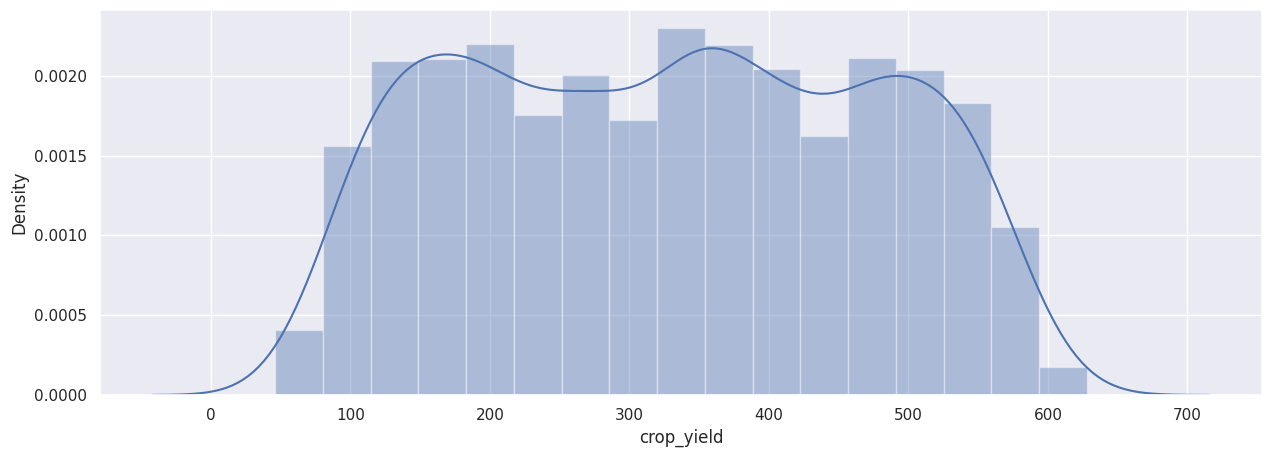

In [ ]:
plt.figure(figsize=(15,5))
sns.distplot(crop['crop_yield'])
plt.show()

MACHINE LEARNING MODEL

In [ ]:
X = crop.drop(columns=['crop_yield'])
y = crop['crop_yield']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train,y_train)

RandomForestRegressor(random_state=42)

MODEL EVALUATION

In [ ]:
importance = rf.feature_importances_
feature_names = X.columns
feature_importance = pd.DataFrame({'Feature': feature_names,
                                   'Importance': importance}).sort_values(by='Importance', ascending=False)
print("\nFeaturenames:")
print(feature_importance)


Featurenames:
              Feature  Importance
2  farm_size_hectares    0.980183
4       fertilizer_kg    0.011616
0         rainfall_mm    0.006937
1  soil_quality_index    0.000951
3      sunlight_hours    0.000314


In [ ]:
y_pred_train = rf.predict(X_train)
r2_train = r2_score(y_train, y_pred_train)
print(r2_train)

0.9997046431868328


In [ ]:
y_pred_test = rf.predict(X_test)
r2_test = r2_score(y_test, y_pred_test)
print(r2_test)

0.9983003152075999
